# (AI Math 9강) CNN 첫걸음

### MLP 연산
1. MLP(다층신경망)은 각 성분 $h_i$에 해당하는 가중치 행들이 $i$번마다 필요하다.
2. $i$가 바뀌면 사용되는 가중치 행렬의 행도 바뀐다.
3. 그래서 가중치 행렬의 구조가 굉장히 커지게 된다. (파라미터가 너무 커짐

## Convolution 연산
1. 그에 반해 convolution 연산은 고정된 **커널(Kernel)**을 입력벡터 상에서 움직여가면서 선형모델과 합성함수가 적용되는 구조이다.
2. 위 그림의 $k$는 커널의 사이즈를 의미한다. (k만큼 입력벡터에서 추출)
3. MLP와 달리 $i$에 따라 가중치 행렬이 바뀌지 않음.
4. Kernel 사이즈가 고정이니까 파라미터 사이즈를 많이 줄일 수 있다.
5. **수학적 의미는, 신호(signal)를 커널을 이용해 국소적으로 증폭 또는 감소시켜서 정보를 필터링하는 것이다.** (정확한 명칭은 cross-correlation 이다.)

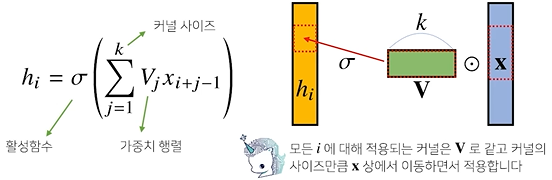

## 2차원 Convolution
1. i와 j가 고정된 상황에서 p와 q를 움직여가면서 계산을 한다.
2. 커널의 0, 1, 2, 3에 맞춰서 입력의 0, 1, 3, 4 가 커널에 적용해서 연산이 된다.
3. 이때, 성분곱(elementwise multiplication)을 통해 계산을 한다.
4. 첫번째 convolution의 계산 결과가 19가 나옴.
5. 이제, 입력 행렬에서 한칸 우측으로 이동하고 다시 똑같이 연산을 진행한다.

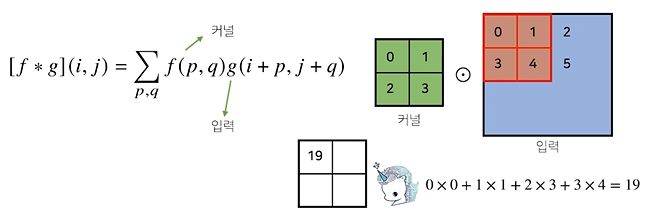

6. 위의 그림처럼, 입력 사이즈$(H, K)$와 커널$(K_H, K_W)$의 사이즈를 안다면, 출력 사이즈$(O_H, O_W)$를 알 수가 있다.

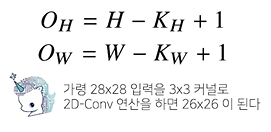

## 채널이 여러개인 Convolution

- 만약에 채널이 여러개인 2차원 입력의 경우, 채널 개수만큼 커널을 만들어서 적용한다.
- 차원 이상부터는 행렬이 아니라 텐서(Tensor)라고 부른다.
- 만약 출력을 여러 채널로 갖고 싶다면, 커널의 개수를 여러개 만들면 된다.

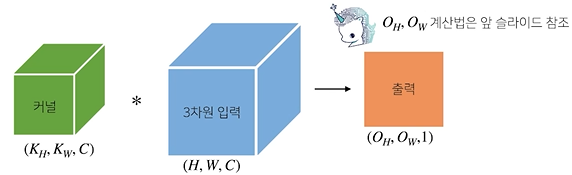

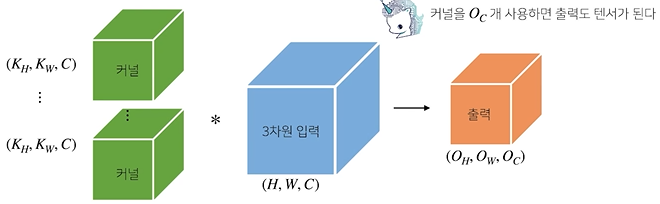

---

## Convolution 연산의 역전파

### 순전파 진행
1. 입력 벡터(x)와 커널(w)이 convolution 연산을 통해 출력 벡터가 나오게 된다.
2. 이때 $x_3$에서 이루어지는 연산을 자세히 보면,
3. $x_3$과 $w_3$이 연산되어서 출력 $O_1$로 간다.
4. $x_3$과 $w_2$이 연산되어서 출력 $O_2$로 간다.
5. $x_3$과 $w_1$이 연산되어서 출력 $O_3$로 간다.

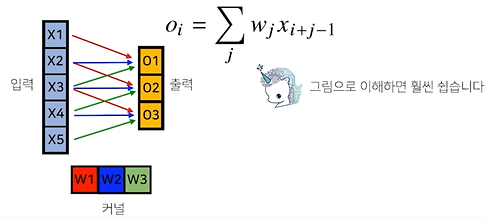

### 역전파 진행 (입력 벡터로 가는 방법)
1. 이번에도 $x_3$에 적용되는 연산은 자세히 보면,
2. 순전파에서 출력 $O_1$에는 $w_3$가 적용됐고, 출력 $O_2$에는 $w_2$가 적용됐고, 출력 $O_3$에는 $w_1$가 적용이 되었었는데, 이와 동일하게 그레디언트가 대응된다.
3. 그레디언트 $\delta_1$이 $w_3$과 곱해져서 $x_3$에 전달된다.
4. 그레디언트 $\delta_2$이 $w_2$과 곱해져서 $x_3$에 전달된다.
5. 그레디언트 $\delta_3$이 $w_1$과 곱해져서 $x_3$에 전달된다.
6. 즉 연전파 단계 중 입력 벡터에 대해서는, 순전파를 할 때 곱해졌던 커널(w)들을 통해서 그레디언트가 전해진다.

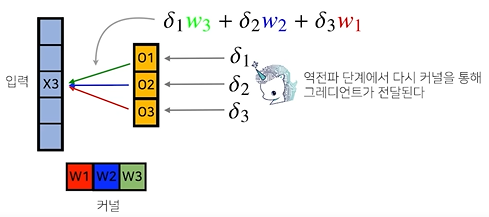

### 역전파 진행 (커널로 가는 방법)
0. 위에서 봤듯이, $\delta_3$가 $w_1$을 타고 $x_3$에 전달되었기 때문에, $\delta_3$는 $w_1$으로 전달된다. 이를 모든 그레디언트에 적용하면, 
1. $O_3$으로 전달된 $\delta_3$이 $x_3$와 곱해져서 $w_1$로 그레디언트가 전달된다.
2. $O_2$으로 전달된 $\delta_2$가 $x_3$와 곱해져서 $w_2$로 그레디언트가 전달된다.
3. $O_1$으로 전달된 $\delta_1$이 $x_3$와 곱해져서 $w_3$로 그레디언트가 전달된다.
4. 따라서 커널에는, $\delta_1$에다가 입력값이 똑같이 곱해져서 전달된다.

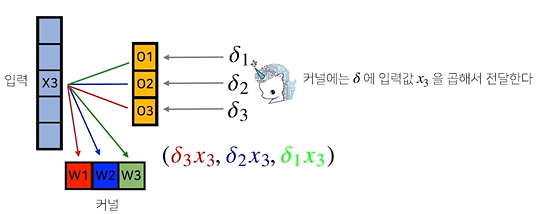

### 역전파 진행 (모든 입력에 대해 커널에 적용)
1. $x_3$ 뿐만 아니라, 그레디언트들을 다른 입력에도 동일하게 적용해서 커널로 적용하자.
2. $w_1$를 통해 전달된 경로를 생각해보면, $x_1$은 $O_1$에, $x_2$는 $O_2$에, $x_3$은 $O_3$에 전달되었었다.
3. 따라서 $x_1$, $x_2$, $x_3$ 각각 $w_1$에 그레디언트를 전달하는 것이다.
4. 동일한 방식으로 다른 커널에 똑같이 적용하면 된다.
4. 결국 그레디언트에 대한 convolution 연산인 것이다.

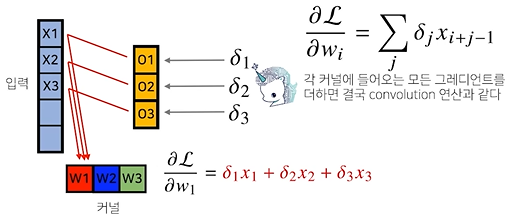

---

# (AI Math 10강) RNN 첫걸음
- 소리, 문자열, 주가 등의 시퀀스(sequence) 데이터에 주로 사용함.
- 이벤트의 발생 순서가 중요한 데이터들을 다룬다. (데이터를 임의로 순서를 바꾸면 안 된다.)
- 과거의 정보를 가지고 앞으로 발생할 데이터의 확률분포를 다루기 위해 **조건부확률**을 이용한다.

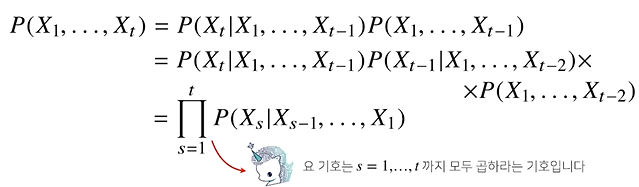

- 하지만 과거의 모든 정보를 가지고 예측을 할 필요는 없다. (필요성에 따라 다름)
- 각각의 시퀀스 시점에서 다룰 데이터의 길이가 다르다.
- 따라서 길이가 가변적인 데이터를 다룰 수 있는 모델이 필요하다.

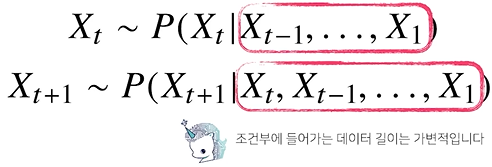

### Latent AR Model

- 만약, 고정된 길이($\tau$)만큼의 시퀀스만 사용한다면, 자기회귀모델(Autoregressive Model, AR)이라고 부른다.
- 하지만 $\tau$를 결정하는 것도 사전지식이 필요하고, 문제에 따라서 $\tau$가 바뀔수도 있다.
- **이런 경우에, 잠재 자기회귀모델(Latent AR)을 사용한다.**
- 바로 직전에 있는 과거 정보(1)와
- 이를 제외한 나머지 예전 과거 정보들(2)을 사용하는데, 나머지 과거 정보들을 $H_t$라는 잠재변수로 인코딩한다.
- 이러한 (1)과 (2)를 사용해서 현재 시점을 예측할 수 있다.
- 장점으로는, 과거 모든 데이터를 활용할 수 있고, 가변적인 데이터 문제를 고정된 길이의 문제로 바꿀 수 있다는 것이다.

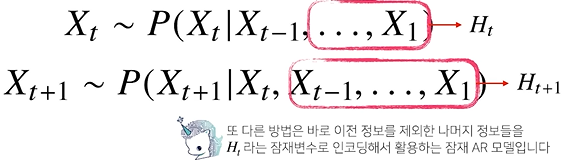

- 하지만 Latent AR Model은 잠재 변수를 어떻게 인코딩할지가 문제이다.
- 이를 해결하기 위해서, RNN이 등장한 것이다.
- $H_t$를 뉴럴 네트워크를 통해서 과거 바로 이전의 정보와 이전의 잠재 변수 모형을 가지고 예측을 한다.


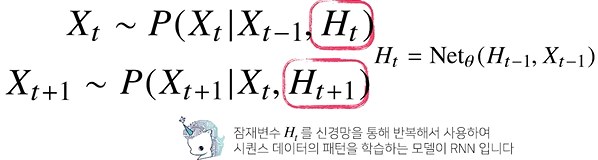

## RNN 이해하기
- RNN에서 $W$는 시퀀스 데이터와 상관없이 불변인 가중치 행렬이다.
- MLP로는 현재의 데이터만 입력으로 오니까 과거의 정보를 계산할 수가 없다.
- 입력으로부터 전달하게 되는 $W_X$ 가중치 행렬과, 이전 잠재변수로부터 정보를 받게되는 $W_H$라는 새로운 가중치 행렬을 만들게 된다.
- 만들어진 잠재변수를 통해서 출력으로 만들어주는 $W_O = W^{(2)}(밑에 그림 참고)$가 있다.

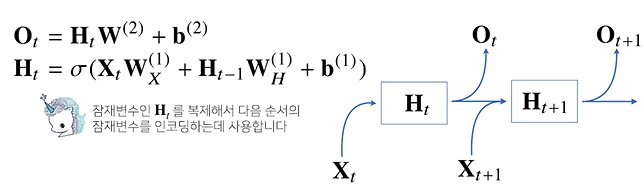

### Process
1. $T$번째 잠재변수는 현재 들어온 입력벡터 $X_t$와 이전 시점의 잠재변수 $H_{t-1}$를 받아서 만들어진다.
2. 이렇게 만들어진 $H_t$를 이용해서 현재 시점의 출력인 $O_t$가 만들어진다.
3. 그리고 이 $H_t$를 다음 시점인 $H_{t+1}$에 사용하게 된다.
- 이 때, $W_X^{(1)}, W_H^{(1)}, W^{(2)}$ 총 3개의 가중치 행렬이 만들어진다.
- 하지만 이 3개의 가중치 행렬들은 $t$에 따라서 변하지 않는다.
- 동일하게 각각의 $t$시점에서 활용되는 것임.

## RNN의 역전파 (BPTT, Backpropagation Through Time)

- 잠재변수의 연결그래프에 따라 순차적으로 계산된다.
- 맨 마지막 시점(최근)에서 과거까지 그레디언트가 흐름.(BPTT)
- 밑의 그림의 빨간선이 그레디언트의 전달 경로임.


1. 잠재변수($H_t$)에 들어오는 그레디언트는 2가지가 있다.
2. 다음시점의 잠재변수($H_{t+1}$)에서 오는 그레디언트 벡터(1), 출력($O_t$)에서 오는 그레디언트 벡터(2) 2가지가 들어옴.
3. 이렇게 들어온 그레디언트 벡터를 이전 시점의 잠재변수($H_{t-1}$)와, 입력($X_t$)에 전달하게 된다.
4. 위 과정을 반복한다.

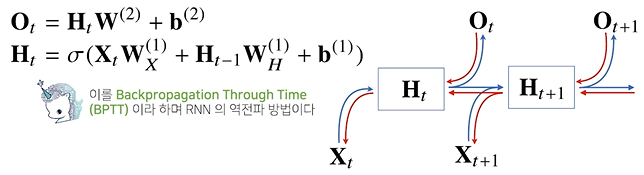

### Gradient Vanishing
- 모든 t시점에 대해 BPTT를 적용하게 되면 gradient 계산이 불안해짐.
- 시퀀스 길이가 길어질수록 미분값이 소실되거나 무한으로 커지는 문제가 생김.
- **이를 해결하기 위해, 특정 시점에서 끊는 truncated BPTT가 생김.**
- $H_t$는 $O_t$에서부터 그레디언트를 받는다. ($H_{t+1}$에서 받질 않음)
- 이럼에도 Vanila RNN 모델들은 긴 시퀀스를 처리하는데 문제가 많음.

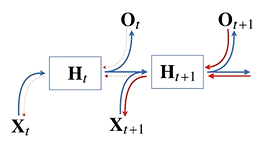